In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

auto = pd.read_csv('/kaggle/input/ISLR-Auto/Auto.csv')
pd.set_option('display.max_rows', None)

auto = auto[auto.horsepower != '?'].copy() # [1]
auto['horsepower']=pd.to_numeric(auto['horsepower'])
auto.set_index('name')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1
chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1


In [2]:
#quantative predictors
quantitative_auto = auto.select_dtypes(include='number')

#qualitative predictors 
qualitative_auto = auto.select_dtypes(exclude='number')
f'qualitative predictors:{qualitative_auto.columns}, quantitative predictors:{quantitative_auto.columns}'

"qualitative predictors:Index(['name'], dtype='object'), quantitative predictors:Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',\n       'acceleration', 'year', 'origin'],\n      dtype='object')"

In [3]:
#ranges of each quantative predictor
a = auto.describe()
a.loc['range'] = a.loc['max'] - a.loc['min'] #loc allows locating entries by boolean expressions, column labels etc.
a.loc['range']

mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
year              12.0
origin             2.0
Name: range, dtype: float64

In [4]:
#standard deviation,mean of each quantitative predictor
quantitative_auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
#removing observations 10-85, showing the std, mean, range
auto1 = auto.drop(auto.index[10:86])
quant_auto1 = auto1.select_dtypes(include='number')
a1 = auto1.describe()
a1.loc['range'] = a1.loc['max'] - a1.loc['min']
quant_auto1.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,316.000000,316.000000,316.000000,316.000000,316.00000,316.000000,316.000000,316.000000
mean,24.407595,5.373418,187.512658,100.848101,2936.53481,15.717405,77.136076,1.601266
std,7.863285,1.654179,100.114616,35.954147,811.87445,2.713876,3.123464,0.819910
min,11.000000,3.000000,68.000000,46.000000,1649.00000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.250000,75.000000,2213.75000,14.000000,75.000000,1.000000
50%,23.950000,4.000000,145.500000,90.000000,2792.50000,15.500000,77.000000,1.000000
75%,30.550000,6.000000,250.000000,115.000000,3508.00000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.00000,24.800000,82.000000,3.000000


In [6]:
#the range of each quantitative predictor, in a newly created dataframe
a1.loc['range']

mpg               35.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3348.0
acceleration      16.3
year              12.0
origin             2.0
Name: range, dtype: float64

In [7]:
quantitative_auto.corr(method='spearman')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.823175,-0.855234,-0.853616,-0.875585,0.441539,0.574841,0.580482
cylinders,-0.823175,1.000000,0.913566,0.816188,0.875972,-0.476266,-0.331087,-0.610468
displacement,-0.855234,0.913566,1.000000,0.876171,0.945630,-0.499403,-0.306582,-0.709573
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142,-0.389498,-0.508989
weight,-0.875585,0.875972,0.945630,0.878819,1.000000,-0.405109,-0.280981,-0.631371
acceleration,0.441539,-0.476266,-0.499403,-0.658142,-0.405109,1.000000,0.278306,0.227406
year,0.574841,-0.331087,-0.306582,-0.389498,-0.280981,0.278306,1.000000,0.165399
origin,0.580482,-0.610468,-0.709573,-0.508989,-0.631371,0.227406,0.165399,1.000000


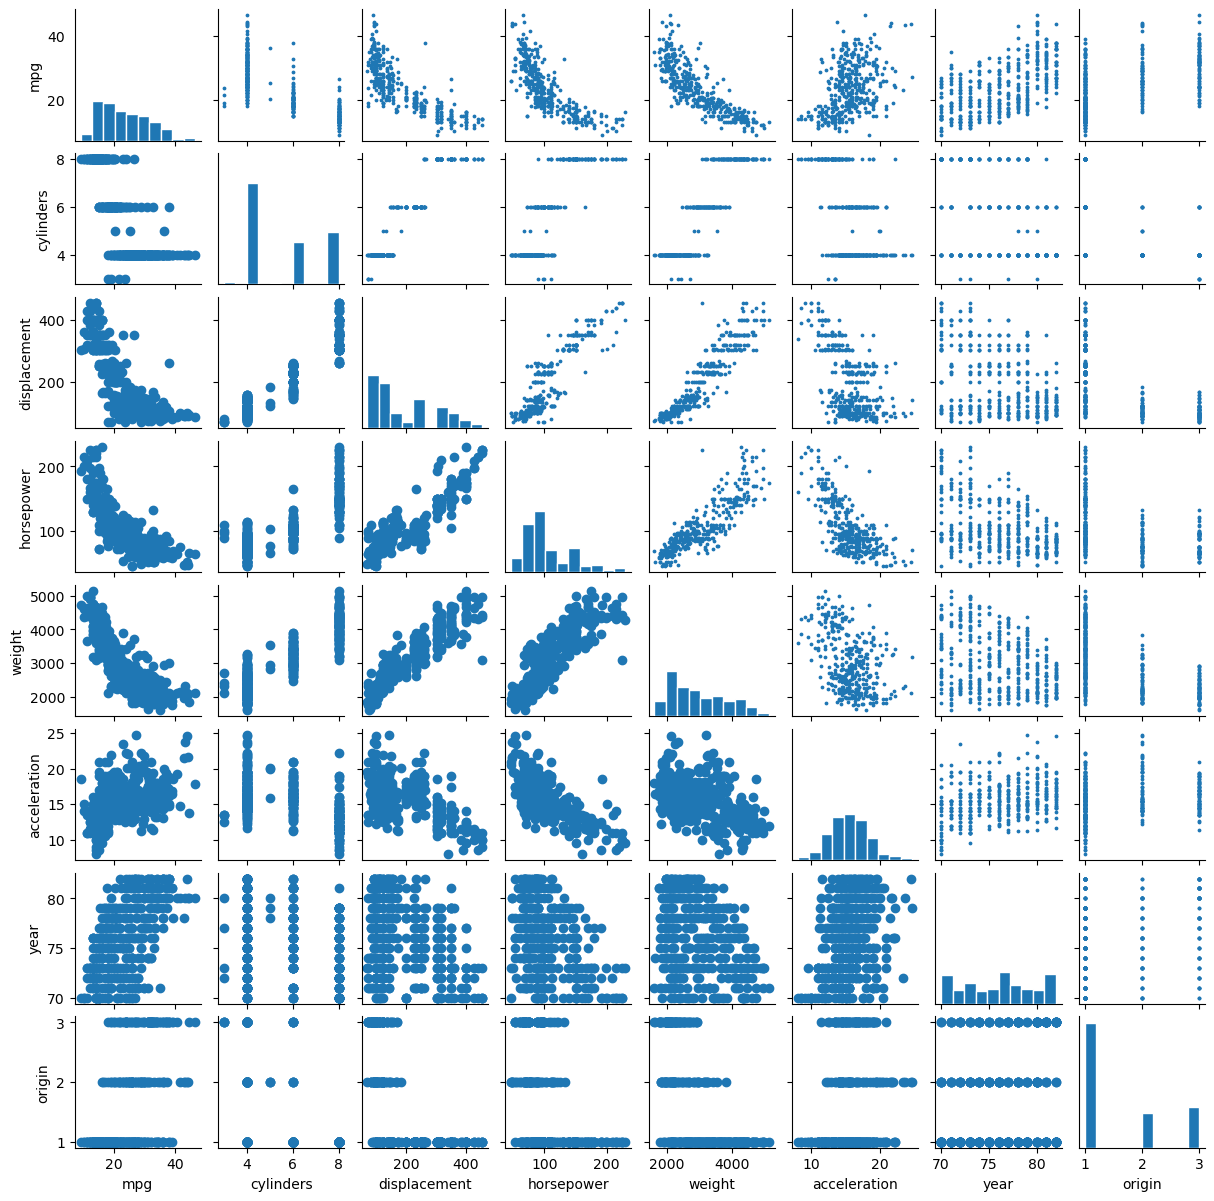

In [8]:
g = sns.PairGrid(auto)
sns.set_style("whitegrid")
g.map_upper(plt.scatter, s=3) #defines the upper triangle of the grid to be scatter plots
g.map_diag(plt.hist) #defines the diagonal of the grid to be histograms
g.map_lower(plt.scatter) #defines the lower triangle of the grid to be scatter plots, like the upper one 
g.fig.set_size_inches(12, 12)

The acceleration histograms looks quite a bit like the normal distribution. When considering the plots of mpg over other predictors, there seems to be a negative, non-linear correlation in displacement, horsepower, weight. Acceleration seems quite noisy, yet it is possible to assume there is a mild positive correlation. Displacement, weight have a strong linear relationship, as well as horsepower and weight with the relationship being positive correlation.  

Speaking of predicting mpg, the most important variables would be weight, horsepower, displacement and year, as there is correlation in between mpg and the aforementioned predictors. 

In [9]:
quantitative_auto.corr(method='spearman') #spearman correlation was chosen, since it also "catches" non-linear correlation, as well as describes the linear case well

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.823175,-0.855234,-0.853616,-0.875585,0.441539,0.574841,0.580482
cylinders,-0.823175,1.000000,0.913566,0.816188,0.875972,-0.476266,-0.331087,-0.610468
displacement,-0.855234,0.913566,1.000000,0.876171,0.945630,-0.499403,-0.306582,-0.709573
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142,-0.389498,-0.508989
weight,-0.875585,0.875972,0.945630,0.878819,1.000000,-0.405109,-0.280981,-0.631371
acceleration,0.441539,-0.476266,-0.499403,-0.658142,-0.405109,1.000000,0.278306,0.227406
year,0.574841,-0.331087,-0.306582,-0.389498,-0.280981,0.278306,1.000000,0.165399
origin,0.580482,-0.610468,-0.709573,-0.508989,-0.631371,0.227406,0.165399,1.000000


The correlation matrix supports the findings from the previous step. However, the mpg-year correlation of 0.5748 shows, that this predictor may be less significant in predicting mpg than the other mentioned ones. 